### ``Repetability`` VS. ``Reproductibility``

Repeatability and reproducibility are two related concepts often used in the context of scientific experiments, studies, or measurements.

* **Repeatability**:  means you have the same execution trace and the same results (up to bitwise identical results)

* **Reproducibility**:  (need changes) means observing the same trend, getting the same scientific fconclusion (with different infrastructures, methods, experiments)

*JCAD - Reproductibilité et répétabilité - peut-on les négliger en calcul à haute performance ?*



Our code bellow is testing simulation (Random walkers trajectories) in Python using different random generators

``Python generators``

* ``(1) Random (Python)`` : based on the Mersenne Twister algorithm (MT19937). Random is known for its long period and high-quality uniform distributions but can be predictable once enough output has been observed.

* ``(2) PCG64 (Numpy)`` : PCG (Permuted Congruential Generator) is a newer algorithm that aims to provide better statistical properties and more randomness in the same amount of space as older algorithms like the Mersenne Twister. It's designed to be fast and to have a small code footprint.

* ``(3) SFC64 (Numpy)``: SFC (Simple Fast Counter) algorithm is another modern RNG designed for speed and simplicity. It uses simple operations (*shift, rotate, add*) on three internal state variables and a counter.

* ``(4) MT19937 (Numpy)``: using NumPy's implementation of the MT, this generator is known for its long period (2^19937−1) and was widely considered the standard for a high-quality RNG. 

* ``(5) Philox (Numpy)`` :  Philox is part of the Random123 suite of RNGs that use counter-based techniques, meaning they generate random numbers based on an initial seed and a sequence number, making them highly parallelizable. Philox is designed for applications requiring large amounts of random numbers, such as Monte Carlo simulations.

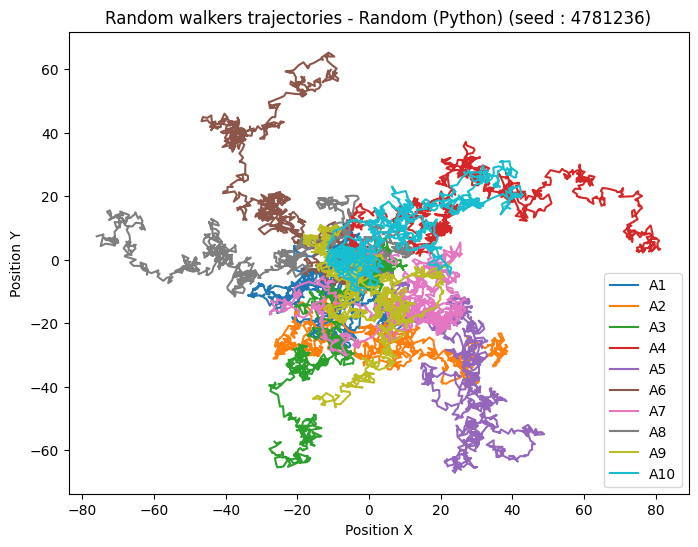

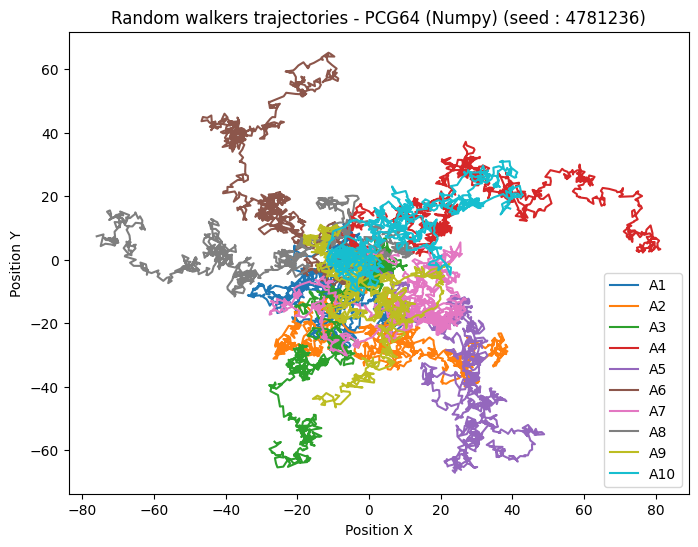

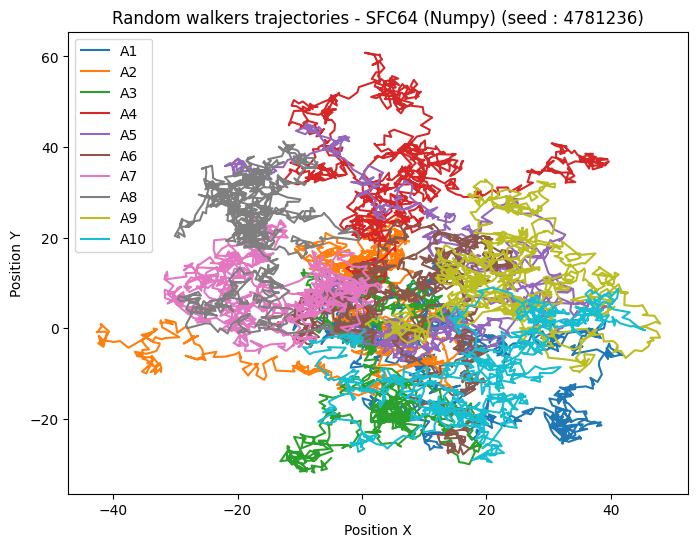

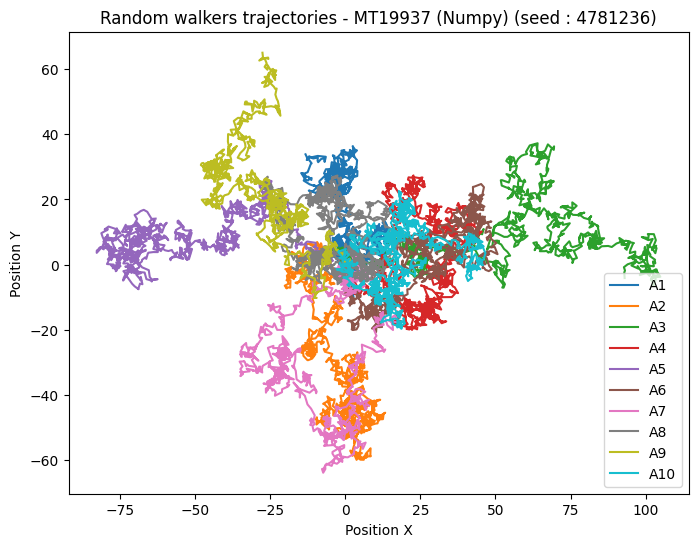

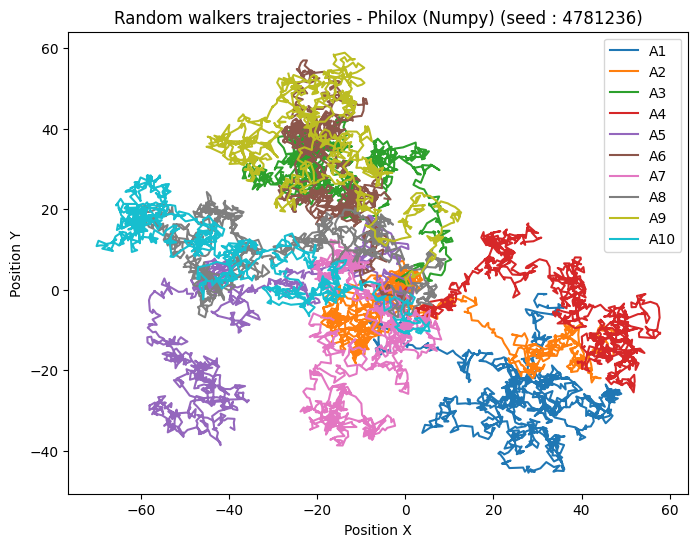

In [10]:
import numpy as np
import matplotlib.pyplot as plt

number_of_agents = 10
number_of_steps = 1000
seed = 4781236 

def simulate_and_plot(generator_func, generator_name):
    np.random.seed(seed)  
    generator = generator_func()  
    positions = np.zeros((number_of_agents, number_of_steps, 2))
    
    for i in range(number_of_agents):
        for step in range(number_of_steps):
            movements = generator.normal(size=(1, 2)) 
            if step == 0:
                positions[i, step, :] = movements
            else:
                positions[i, step, :] = positions[i, step - 1, :] + movements
    
    plt.figure(figsize=(8, 6))
    for i in range(number_of_agents):
        plt.plot(positions[i, :, 0], positions[i, :, 1], label=f'A{i+1}')
    plt.title(f'Random walkers trajectories - {generator_name} (seed : {seed})')
    plt.xlabel('Position X')
    plt.ylabel('Position Y')
    plt.legend()
    plt.show()

generators = [
    ("Random (Python)", lambda: np.random.default_rng(seed)), 
    ("PCG64 (Numpy)", lambda: np.random.default_rng(np.random.PCG64(seed))),
    ("SFC64 (Numpy)", lambda: np.random.default_rng(np.random.SFC64(seed))),
    ("MT19937 (Numpy)", lambda: np.random.default_rng(np.random.MT19937(seed))),
    ("Philox (Numpy)", lambda: np.random.default_rng(np.random.Philox(seed)))
]

for name, generator_func in generators:
    simulate_and_plot(generator_func, name)

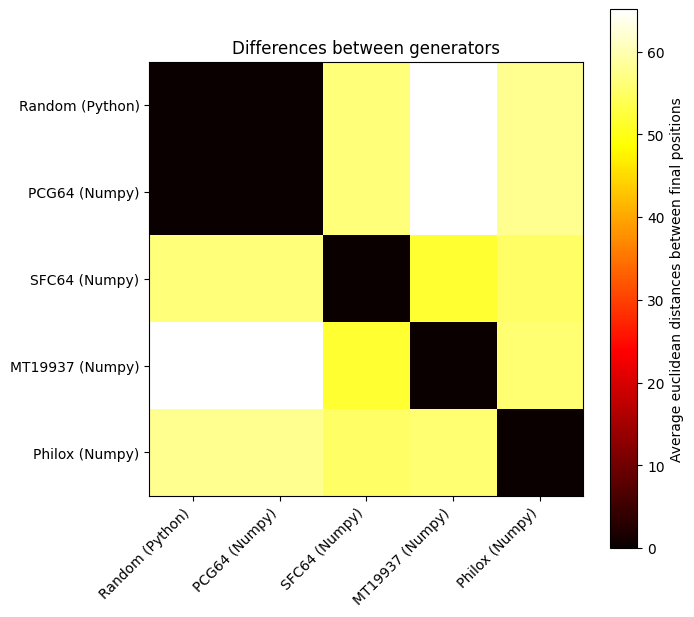

In [11]:
final_positions = np.zeros((len(generators), number_of_agents, 2))

for index, (name, generator_func) in enumerate(generators):
    generator = generator_func()
    positions = np.zeros((number_of_agents, number_of_steps, 2))
    
    for i in range(number_of_agents):
        for step in range(number_of_steps):
            movements = generator.normal(size=(1, 2))
            if step == 0:
                positions[i, step, :] = movements
            else:
                positions[i, step, :] = positions[i, step - 1, :] + movements
    
    final_positions[index] = positions[:, -1, :]

differences = np.zeros((len(generators), len(generators)))
for i in range(len(generators)):
    for j in range(i+1, len(generators)):
        diff = np.linalg.norm(final_positions[i] - final_positions[j], axis=1).mean()
        differences[i, j] = diff
        differences[j, i] = diff

plt.figure(figsize=(7, 7))
plt.imshow(differences, cmap='hot')
plt.colorbar(label='Average euclidean distances between final positions')
plt.xticks(range(len(generators)), [name for name, _ in generators], rotation=45, ha='right')
plt.yticks(range(len(generators)), [name for name, _ in generators])
plt.title('Differences between generators')
plt.show()